# Tryouts with PyTorch

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)

In [3]:
# project_common_path = os.path.dirname('.')

# if 'INPUT_PATH' in os.environ:
#     INPUT_PATH = os.environ['INPUT_PATH']
# else:
#     INPUT_PATH = os.path.abspath(os.path.join(project_common_path, '..', 'input'))

# if 'OUTPUT_PATH' in os.environ:
#     OUTPUT_PATH = os.environ['OUTPUT_PATH']
# else:
#     OUTPUT_PATH = os.path.abspath(os.path.join(project_common_path, '..', 'output'))

# DATA_PATH = INPUT_PATH


In [4]:
import torch
import torchvision
from torch.utils.data import DataLoader

In [6]:
from torchvision.transforms import ToTensor, Compose
from common.pytorch.CarvanaDataset import CarvanaDatasetPIL
from torchsample.transforms import RandomGamma, RandomBrightness, RandomContrast, RandomSaturation

In [11]:
batch_size = 16
geom_transform = None
color_transform = Compose([
        ToTensor(),
        RandomGamma(0.55, 1.55),
        RandomBrightness(-0.5, 0.5),
#         RandomContrast(-1.0, 1.0),
        RandomSaturation(-0.5, 0.5)
    ])

carvana_trainval = CarvanaDatasetPIL(dataset_type=CarvanaDatasetPIL.TRAINVAL, 
                                     geom_transform=geom_transform, 
                                     color_transform=color_transform)

In [12]:
loader = DataLoader(dataset=carvana_trainval, batch_size=batch_size, shuffle=True, num_workers=4)

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

torch.Size([16, 3, 1280, 1918]) torch.Size([16, 1, 1280, 1918])


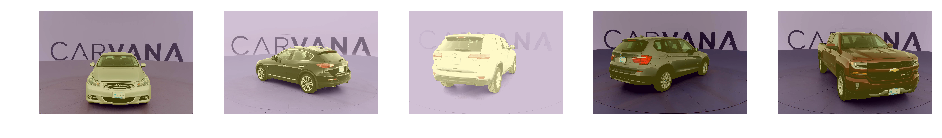

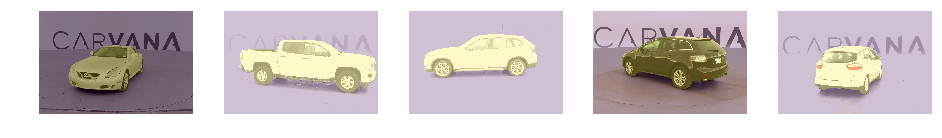

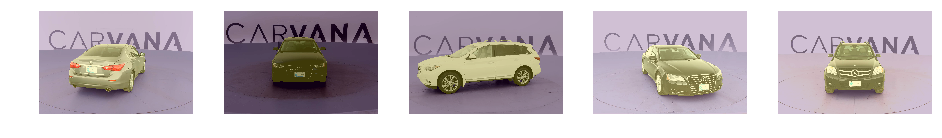

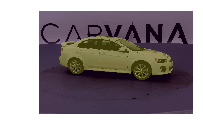

In [14]:
loop_max_counter = 1

for batch_imgs, batch_masks in loader:
    
    print(batch_imgs.shape, batch_masks.shape)
    n = 5    
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(16, 16))
        plt.subplot(1, n, counter % n + 1)
        img = batch_imgs[counter, :, :, :].numpy().transpose([1, 2, 0])
        mask = batch_masks[counter, 0, :, :].numpy()
                        
        plt.imshow(img)
        plt.imshow(mask, alpha=0.25)
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break